In [6]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import time
%matplotlib notebook


data=arff.loadarff(open('./artificial/dartboard1.arff','r'))
data2=np.loadtxt('./dataset_part2/h.data')

listX = []
listY=[]
for point in data[0]:
    listX.append(point[0])
    listY.append(point[1])

#transformation en np.array()
X = []
for point in data[0]:
    X.append([point[0],point[1]])
X=np.array(X)



<IPython.core.display.Javascript object>


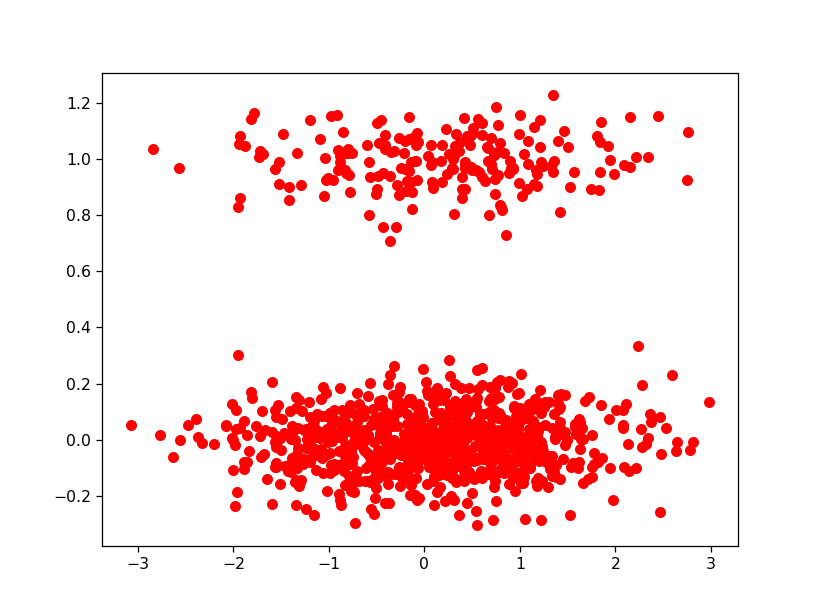

In [51]:
#affichages des datas
plt.plot(listX,listY, 'ro')
plt.show()

<IPython.core.display.Javascript object>


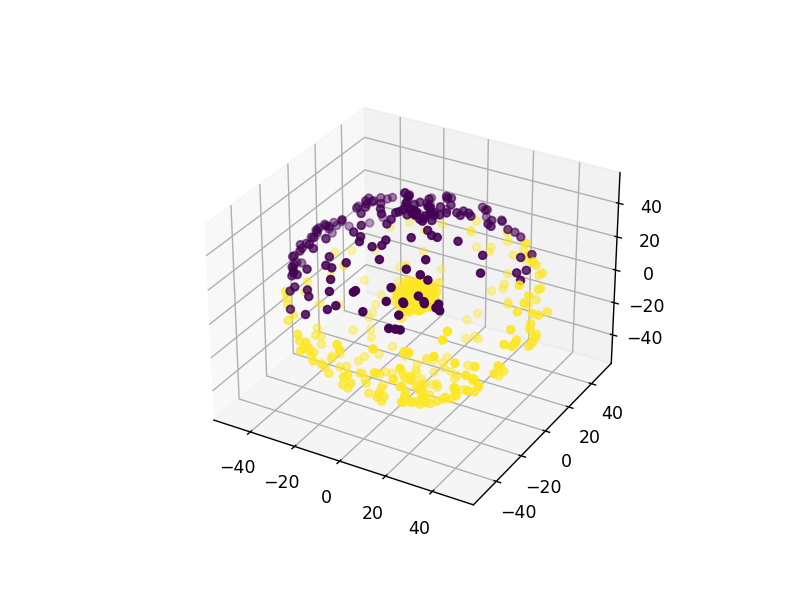

score: 0.4176929456784954


In [6]:
#méthode k-means
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(data2)
figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
#plt.subplot(221)
#plt.scatter(X[:, 0], X[:, 1], c=kmeans)
print("score:",metrics.silhouette_score(data2, kmeans, metric='euclidean'))

<IPython.core.display.Javascript object>


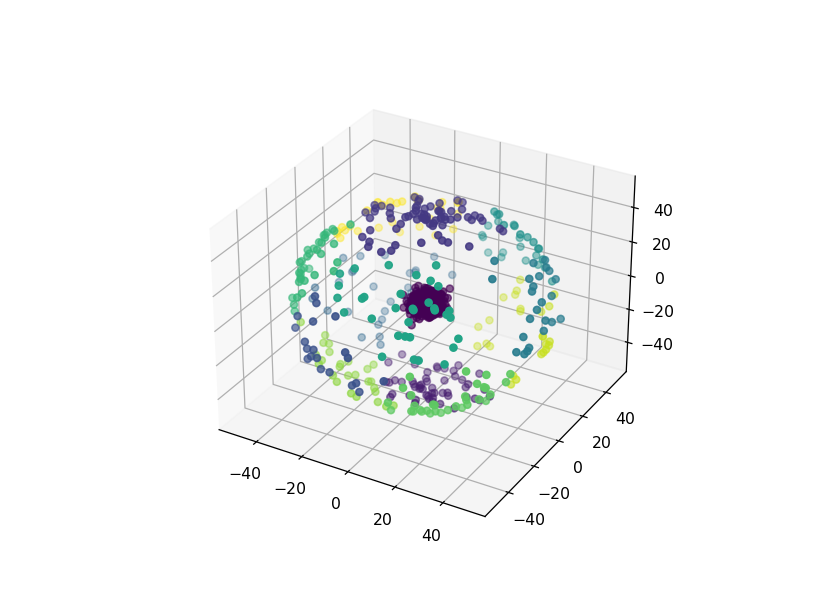

métrique: 0.6224202013307731
nombre de cluster: 13
temps: 10.436827182769775


In [101]:
#variation des paramètres et calculs du score sur kMeans
find = False
nb_cluster = 2
metric_best = 0
limit=50
iteration = 0

start=time.time()

while(nb_cluster < limit):
    kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, kmeans, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        best_nb_cluster= nb_cluster
        best_kmeans = kmeans
    nb_cluster+=1
    
end=time.time() 
figure=plt.figure()
#plt.subplot(221)
#plt.scatter(data2[:, 0], data2[:, 1], c=best_kmeans)


ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=best_kmeans)

print("métrique:",metric_best)
print("nombre de cluster:",best_nb_cluster)
print("temps:", end-start)

<IPython.core.display.Javascript object>


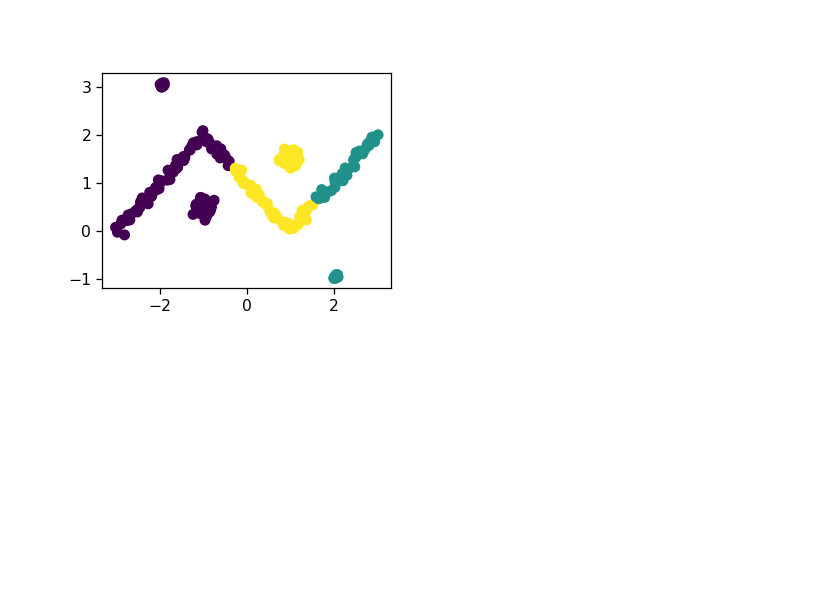

score: 0.4370200861798406


In [20]:
#méthode agglomerate-clustering
clustering = AgglomerativeClustering(n_clusters=3,linkage='ward').fit_predict(data2)
plt.figure()
plt.subplot(221)
plt.scatter(data2[:, 0], data2[:, 1], c=clustering)
print("score:",metrics.silhouette_score(data2, clustering, metric='euclidean'))

<IPython.core.display.Javascript object>


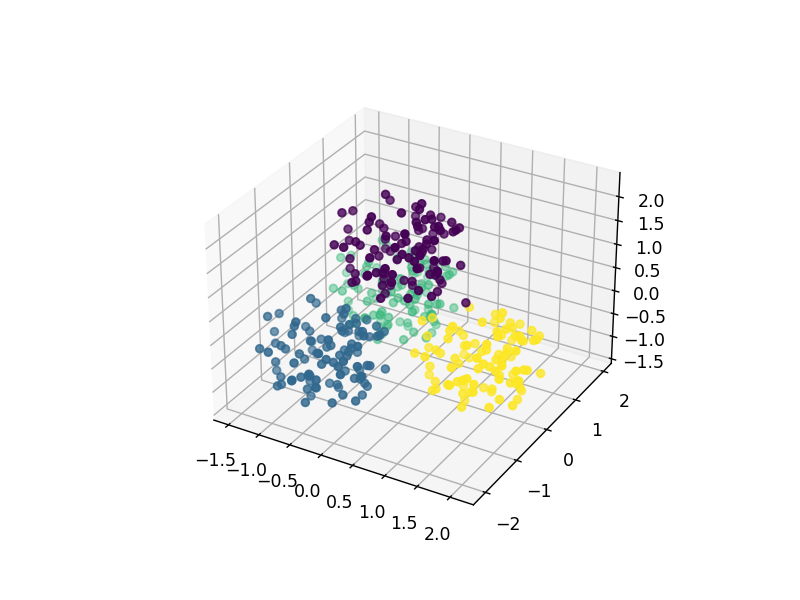

métrique: 0.5046643743963499
nombre de cluster: 4
temps: 0.5025837421417236


In [33]:
#variation des paramètres et calculs du score sur clustering-agglomerate
find = False
nb_cluster = 2 #on commence à deux clusters ou le calcul du score ne fonctionne pas
metric_best = -1
limit=50
start=time.time()

while(nb_cluster<limit):
    clustering = AgglomerativeClustering(n_clusters=nb_cluster,linkage='average').fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, clustering, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        best_clustering = clustering
        best_nb_cluster = nb_cluster
    nb_cluster+=1
end=time.time()

figure=plt.figure()
#plt.subplot(221)
#plt.scatter(data2[:, 0], data2[:, 1], c=best_clustering)
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=best_clustering)
print("métrique:",metric_best)
print("nombre de cluster:",best_nb_cluster)
print("temps:", end-start)


<IPython.core.display.Javascript object>


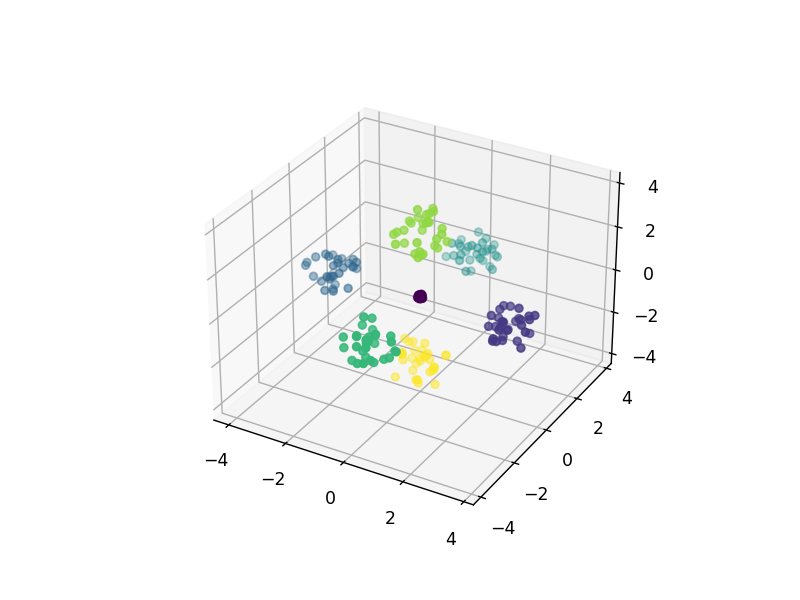

score: 0.7019231989948802
eps: 0.9
min sample: 5


In [53]:
#méthode DBSCAN
clustering = DBSCAN(eps=0.9, min_samples=5).fit_predict(data2)
plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=clustering)
print("score:",metrics.silhouette_score(data2, clustering, metric='euclidean'))
print("eps:",0.9)
print("min sample:", 5)

In [10]:
#variation des paramètres et calculs du score sur DBSCAN
find_eps = False
metric_best = -1
eps_max = 0.5
limite=40
best_clustering=1

start=time.time()
while(eps_max >0.4):
    clustering = DBSCAN(eps=eps_max, min_samples=2).fit(X)
    n_clusters = len(set(clustering.labels_))
    #check du nombre de cluster pour le calcul du score
    if(n_clusters !=1):
        clustering_to_plot = DBSCAN(eps=eps_max, min_samples=10).fit_predict(X)
        find_metric = metrics.silhouette_score(data2, clustering_to_plot, metric='euclidean')
        if find_metric > metric_best:
            metric_best=find_metric
            best_clustering = clustering_to_plot
            eps=eps_max
            eps_max = eps_max-0.01
        else:
            find_eps=True
    else:
        eps_max=eps_max-0.01

end=time.time()

figure=plt.figure()
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=best_clustering)
#ax=plt.axes(projection='3d')
#ax.scatter3D(X[:,0], X[:,1], X[:,2], c=best_clustering)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)
print(eps)


<IPython.core.display.Javascript object>

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 1000.

In [ ]:
#variation des paramètres et calculs du score sur DBSCAN
find_eps = False
metric_best = -1
eps_max = 0.5
limite=40
best_clustering=1

start=time.time()
while(eps_max >0.4):
    clustering = DBSCAN(eps=eps_max, min_samples=2).fit(X)
    n_clusters = len(set(clustering.labels_))
    #check du nombre de cluster pour le calcul du score
    if(n_clusters !=1):
        clustering_to_plot = DBSCAN(eps=eps_max, min_samples=10).fit_predict(X)
        find_metric = metrics.silhouette_score(data2, clustering_to_plot, metric='euclidean')
        if find_metric > metric_best:
            metric_best=find_metric
            best_clustering = clustering_to_plot
            eps=eps_max
            eps_max = eps_max-0.01
        else:
            find_eps=True
    else:
        eps_max=eps_max-0.01

end=time.time()

figure=plt.figure()
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=best_clustering)
#ax=plt.axes(projection='3d')
#ax.scatter3D(X[:,0], X[:,1], X[:,2], c=best_clustering)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)
print(eps)

<IPython.core.display.Javascript object>


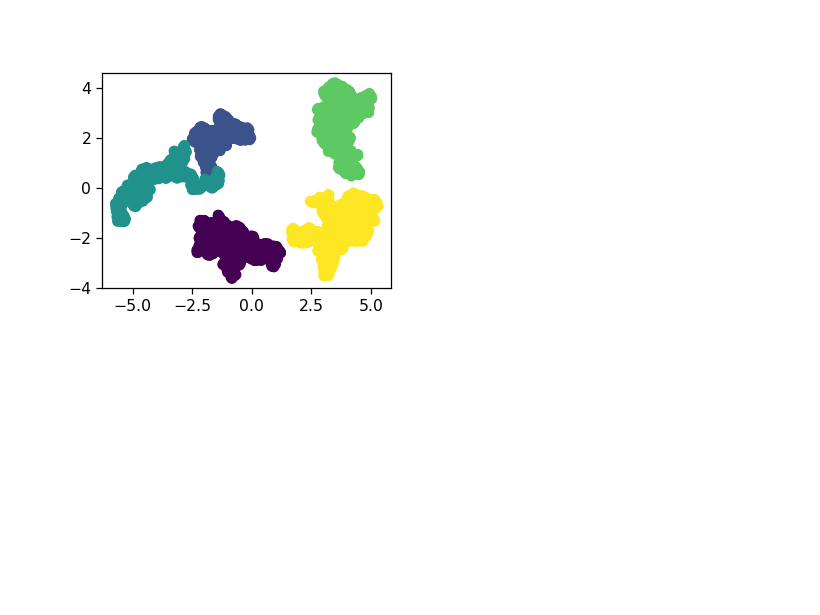

score: 0.6492858972614843


In [99]:
#méthode HDBSCAN
clustering = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=13).fit_predict(data2)
plt.figure()
plt.subplot(221)
plt.scatter(data2[:, 0], data2[:, 1], c=clustering)
print("score:",metrics.silhouette_score(data2, clustering, metric='euclidean'))

<IPython.core.display.Javascript object>


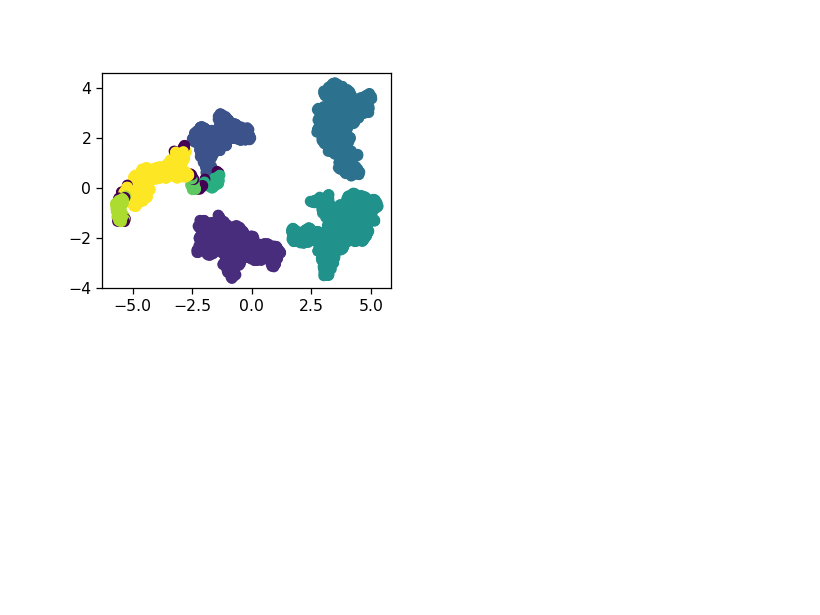

métrique: 0.6492858972614843
Taille minimale du cluster: 6
temps: 62.825504302978516


In [96]:
#variation des paramètres et calculs du score sur HDBSCAN
find_best = False
metric_best = -1
size_best = 0
cluster_size_min = 2
limit=20

start=time.time()
while(cluster_size_min < limit): 
    clustering = hdbscan.HDBSCAN(min_cluster_size=cluster_size_min, min_samples=13).fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, clustering, metric='euclidean')
    if find_metric >= metric_best:
        metric_best=find_metric
        size_best=cluster_size_min
        best_clustering = clustering
    cluster_size_min = cluster_size_min + 1
        

end=time.time()

figure=plt.figure()
plt.subplot(221)
plt.scatter(data2[:, 0], data2[:, 1], c=clustering)
#ax=plt.axes(projection='3d')
#ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=best_clustering)
print("métrique:",metric_best)
print("Taille minimale du cluster:",size_best)
print("temps:", end-start)